In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn import preprocessing

In [2]:
path="/Users/ecemdenizbabaoglan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [3]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [4]:
SEED=12345 #ilerde seed kullanılacak yerler için 

In [5]:
ds=pd.read_csv(path)

In [6]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
ds.shape

(1470, 35)

In [9]:
ds.isnull().sum() #null veri yok

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
ds['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [11]:
ds.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [12]:
#attrition olan ve olmayanlara göre öznitelikleri inceleyebilmek için
#iki ayrı datasete böleceğim
# Attrition -> ds_pos
# No attrition -> ds_neg

In [13]:
ds['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
ds_pos_ix=list()
ds_neg_ix=list()

In [15]:
for i in range(len(ds)):
    if ds.loc[i,'Attrition']== 'Yes':
        ds_pos_ix.append(i)
    elif ds.loc[i,'Attrition']== 'No':
        ds_neg_ix.append(i)
    else:
        print("wrong input")
    i+=1

In [16]:
ds.loc[ds_pos_ix,:].describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237,237,237.000000,237,237.000000,237.000000,237,237.0,237.000000,237.000000,237,237.000000,237.000000,237.000000,237,237.000000,237,237.000000,237.000000,237.000000,237,237,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
unique,NaN,1,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yes,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Laboratory Technician,NaN,Single,NaN,NaN,NaN,Y,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,237,156,NaN,133,NaN,NaN,89,NaN,NaN,NaN,150,NaN,NaN,NaN,62,NaN,120,NaN,NaN,NaN,237,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.607595,NaN,NaN,750.362869,NaN,10.632911,2.839662,NaN,1.0,1010.345992,2.464135,NaN,65.573840,2.518987,1.637131,NaN,2.468354,NaN,4787.092827,14559.308017,2.940928,NaN,NaN,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,NaN,NaN,401.899519,NaN,8.452525,1.008244,NaN,0.0,580.750572,1.169791,NaN,20.099958,0.773405,0.940594,NaN,1.118058,NaN,3640.210367,7208.153264,2.678519,NaN,NaN,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,NaN,NaN,103.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,31.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2326.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,NaN,408.000000,NaN,3.000000,2.000000,NaN,1.0,514.000000,1.000000,NaN,50.000000,2.000000,1.000000,NaN,1.000000,NaN,2373.000000,8870.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,NaN,NaN,699.000000,NaN,9.000000,3.000000,NaN,1.0,1017.000000,3.000000,NaN,66.000000,3.000000,1.000000,NaN,3.000000,NaN,3202.000000,14618.000000,1.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,NaN,NaN,1092.000000,NaN,17.000000,4.000000,NaN,1.0,1486.000000,4.000000,NaN,84.000000,3.000000,2.000000,NaN,3.000000,NaN,5916.000000,21081.000000,5.000000,NaN,NaN,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000


In [17]:
ds.loc[ds_neg_ix,:].describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233,1233,1233.000000,1233,1233.000000,1233.000000,1233,1233.0,1233.000000,1233.000000,1233,1233.000000,1233.000000,1233.000000,1233,1233.000000,1233,1233.000000,1233.000000,1233.00000,1233,1233,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
unique,NaN,1,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,887,NaN,828,NaN,NaN,517,NaN,NaN,NaN,732,NaN,NaN,NaN,269,NaN,589,NaN,NaN,NaN,1233,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.561233,NaN,NaN,812.504461,NaN,8.915653,2.927007,NaN,1.0,1027.656123,2.771290,NaN,65.952149,2.770479,2.145985,NaN,2.778589,NaN,6832.739659,14265.779400,2.64558,NaN,NaN,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,NaN,NaN,403.208379,NaN,8.012633,1.027002,NaN,0.0,606.217074,1.071132,NaN,20.380754,0.692050,1.117933,NaN,1.093277,NaN,4818.208001,7102.260749,2.46009,NaN,NaN,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,2.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1051.000000,2094.000000,0.00000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,NaN,NaN,477.000000,NaN,2.000000,2.000000,NaN,1.0,483.000000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,3211.000000,7973.000000,1.00000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,817.000000,NaN,7.000000,3.000000,NaN,1.0,1022.000000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,5204.000000,14120.000000,2.00000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1176.000000,NaN,13.000000,4.000000,NaN,1.0,1574.000000,4.000000,NaN,83.000000,3.000000,3.000000,NaN,4.000000,NaN,8834.000000,20364.000000,4.00000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000


In [18]:
#Yukarıda describe() ile attrition=yes ve attrition=no olan çalışanlar
#için elde edilen bilgilere göre;
#StandardHour herkes için aynı
#EmployeeCount her zaman 1
#Over18 her zaman yes
#EmployeeNumber irrelevant


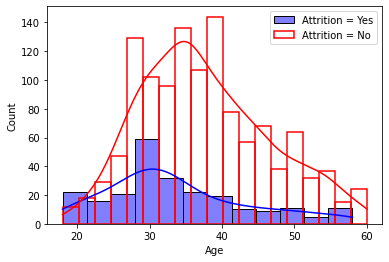

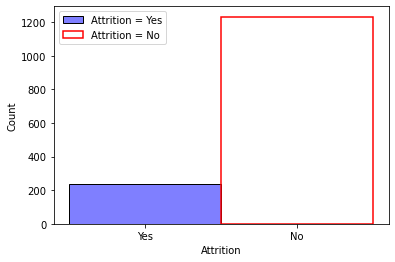

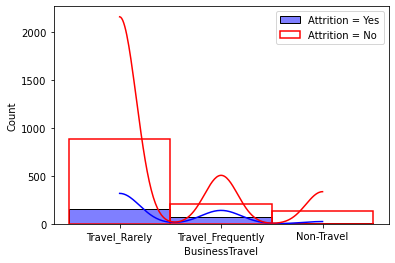

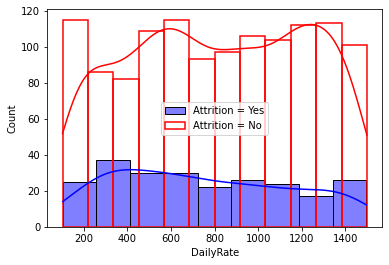

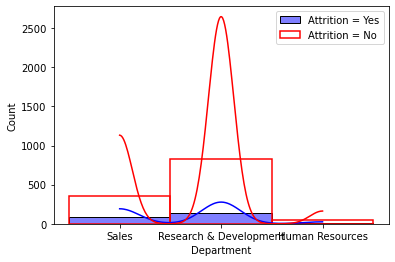

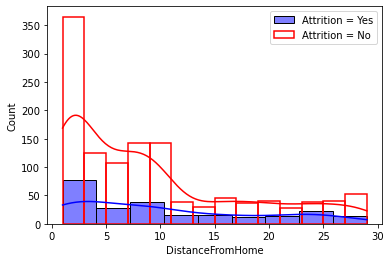

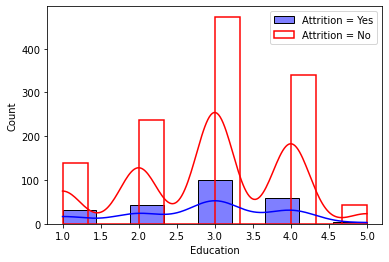

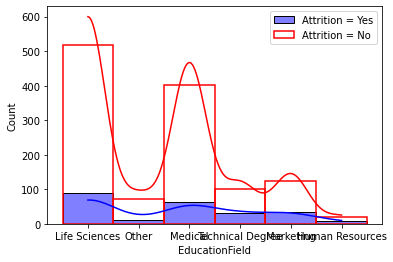

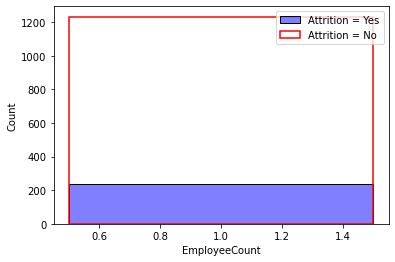

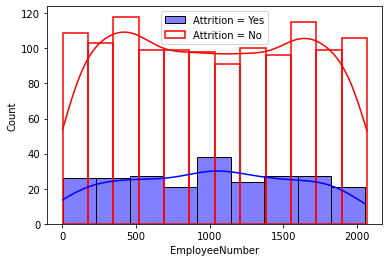

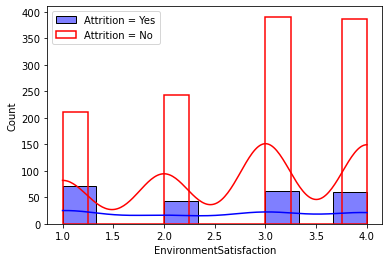

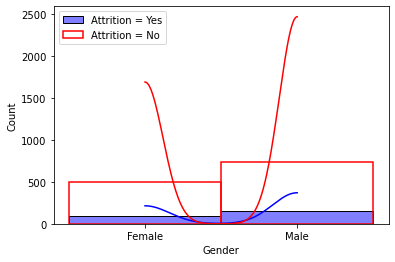

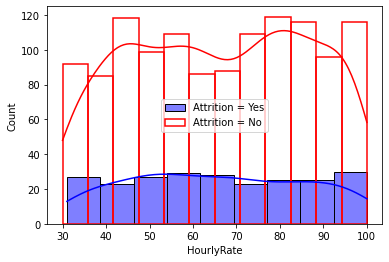

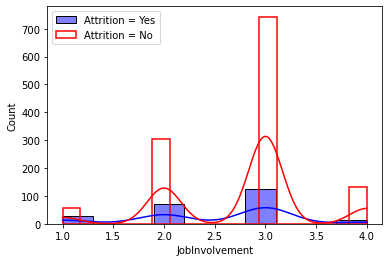

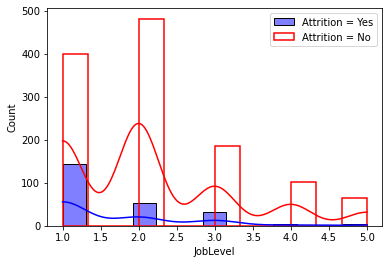

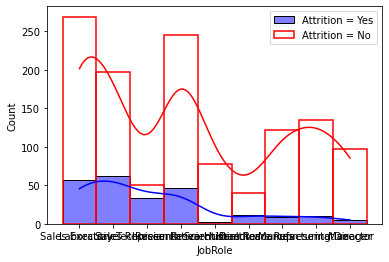

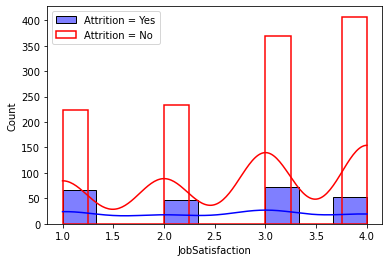

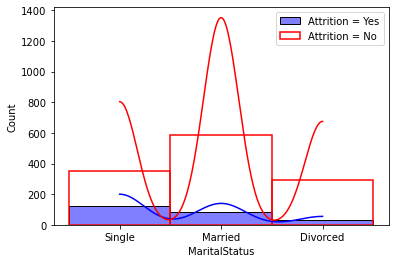

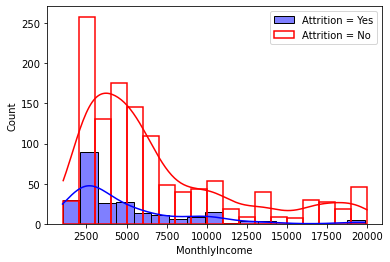

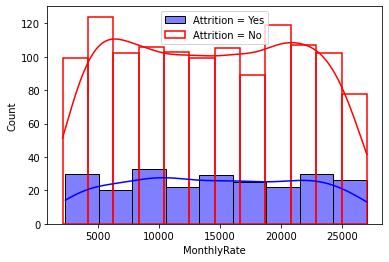

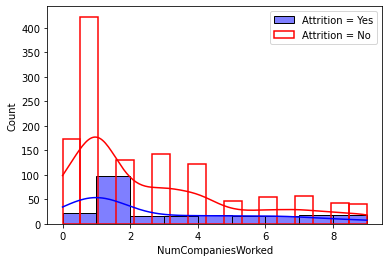

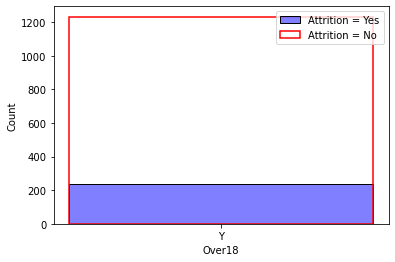

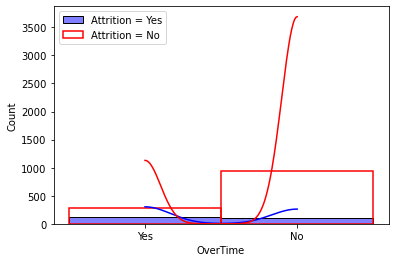

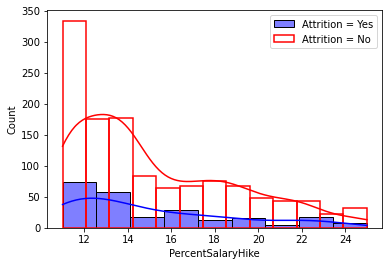

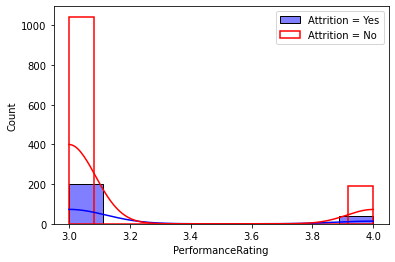

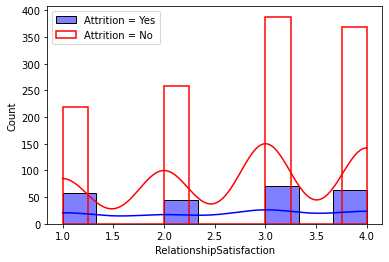

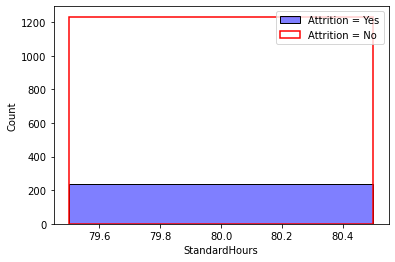

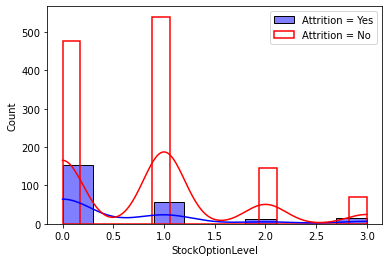

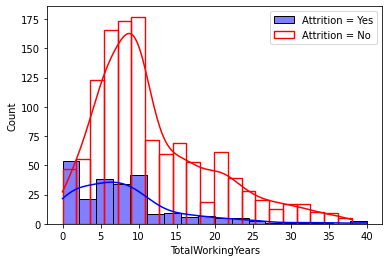

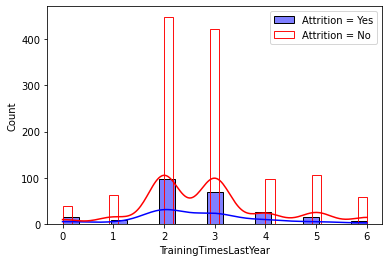

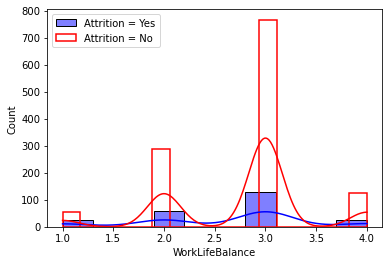

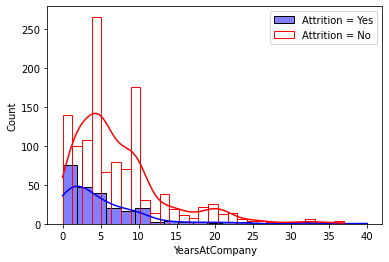

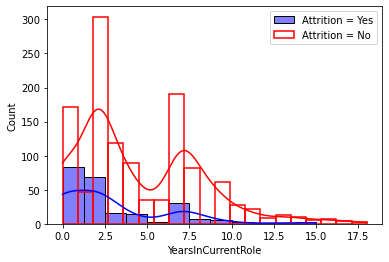

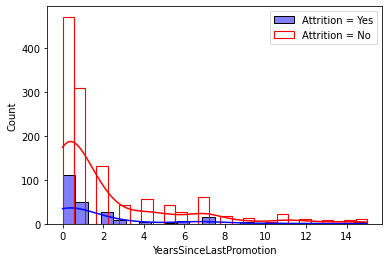

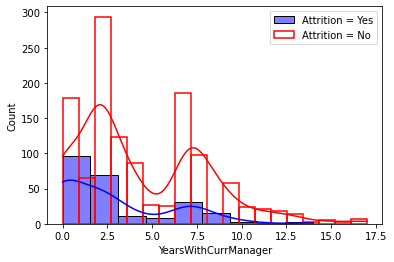

In [19]:
#for i in range(len(ds.columns)):
#    sns.histplot(data=ds.iloc[ds_pos_ix,i], kde=True, color='blue', label='Attrition = Yes')
#    sns.histplot(data=ds.iloc[ds_neg_ix,i], kde=True, color='red', fill=False, label='Attrition = No')
#    plt.legend()
#    plt.show() 

<AxesSubplot:>

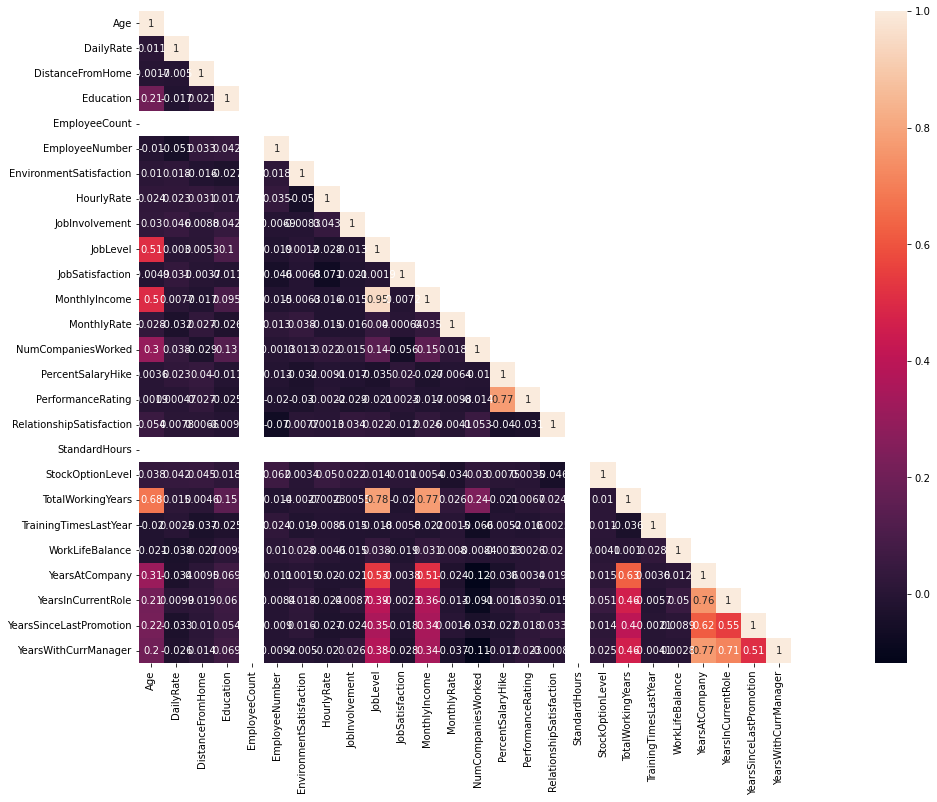

In [20]:
ds_corr=ds.corr()
mask=np.array(ds_corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=ds_corr, mask=mask, square=True, annot=True, cbar=True)

In [21]:
#Feature Encoding

label_encoded_df=ds.copy()
le = preprocessing.LabelEncoder()
for col in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [26]:
label_encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#label_encoded_df ile attrition yes=1 ve no=0 olanları tekrar ayırıyoruz


In [28]:
scaler=preprocessing.StandardScaler()
scaled_df=scaler.fit_transform(label_encoded_df)

In [33]:
#scaled_df[:10]

In [35]:
from sklearn.manifold import TSNE

In [62]:
new_df=label_encoded_df.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'], axis=1)

In [67]:
tsne=TSNE(learning_rate=50, perplexity=100)
tsne_features=tsne.fit_transform(new_df)

/Users/ecemdenizbabaoglan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [64]:
tsne_features.shape

(1470, 2)

In [68]:
new_df['x']=tsne_features[:,0]
new_df['y']=tsne_features[:,1]

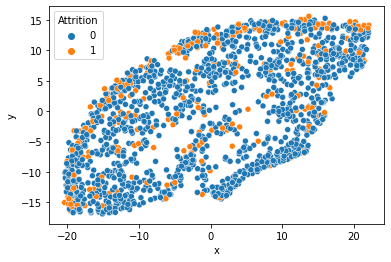

In [69]:
sns.scatterplot(x='x',y='y',hue='Attrition', data=new_df)
plt.show()